## Survey of Mental Health in TechIndustry :

In [ ]:
## Dataset Information
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency 
of mental health disorders in the tech workplace. 

### Hypothesis :

### Some questions worth exploring:
1.	How does the frequency of mental health illness and attitudes towards mental health vary by geographic location?
2.	What are the strongest predictors of mental health illness or certain attitudes towards mental health in the workplace?


In [ ]:
#### Importing some Basic Libraries :

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#### Reading the Data :

In [82]:
df = pd.read_csv(r'C:\Users\shahe\Desktop\PythonProject\PersonalProject\survey.csv')
    

In [84]:
df.drop(df[df['Age'] < 0].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)
df.drop(df[df['Age'] < 15].index, inplace = True) # I dont think people below age 15 are allowed in the work force.
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

In [96]:
# Binning :
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()
    
    
    # Create list by adding min and max to cut_points
    break_points = [minval] + cut_points +[maxval]
    #if no labels provided, use default labels0....(n+1)
    if not labels:
        labels = range(len(cut_points)+1)
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    
    return colBin

In [97]:
cut_points = [29,50,70]
labels = ['Youth', 'MiddleAgeYouth', 'YoungSenoirs','Seniors']
df['Age_Bins'] = binning(df["Age"], cut_points, labels)

In [98]:
df['Age_Bins'].value_counts()


MiddleAgeYouth    709
Youth             516
YoungSenoirs       25
Seniors             1
Name: Age_Bins, dtype: int64

In [ ]:
ri.dropna(subset=['stop_date', 'stop_time'], inplace=True)

In [ ]:
df.drop['Age']

In [102]:
df.drop(['Age'], axis=1,inplace = True)

In [103]:
df.dtypes

Timestamp                      object
Gender                         object
Country                        object
state                          object
self_employed                  object
family_history                 object
treatment                      object
work_interfere                 object
no_employees                   object
remote_work                    object
tech_company                   object
benefits                       object
care_options                   object
wellness_program               object
seek_help                      object
anonymity                      object
leave                          object
mental_health_consequence      object
phys_health_consequence        object
coworkers                      object
supervisor                     object
mental_health_interview        object
phys_health_interview          object
mental_vs_physical             object
obs_consequence                object
comments                       object
Age_Bins    

In [88]:
df['Age_Bins'] = pd.cut(x=df['Age'], bins=[29,50,75], labels=['Youth', 'MiddleAgeYouth', 'YoungSenoirs','Seniors'])

ValueError: Bin labels must be one fewer than the number of bin edges

In [ ]:
## Exploratory Data Analysis :

### Checking the Shape of the Data Set :

In [96]:
### Checking the Shape of the Data Frame.

print ( f" The Shape of the Data Set: {df.shape} \n")
print ( f" Number of Observations: {df.shape[0]}\n " )
print ( f" Number of Columns: {df.shape[1]}\n " )

 The Shape of the Data Set: (1259, 27) 

 Number of Observations: 1259
 
 Number of Columns: 27
 


In [5]:
df.columns


Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [65]:
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [58]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [59]:
df['benefits'].value_counts()

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

In [60]:
df['care_options'].value_counts()

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

In [61]:
df['care_options'].replace(['Not sure'], "Don't know", inplace = True)

In [54]:
df['care_options'].value_counts()

No            501
Yes           444
Don't know    314
Name: care_options, dtype: int64

In [70]:
df3 = df[['benefit','care_options']]

KeyError: "['benefit'] not in index"

In [78]:
df['benifit_care_options']=df['benefits']      +  '     '    +     df['care_options']

In [80]:
df['benifit_care_options'].head(50)
                               

0            Yes     Don't know
1             Don't know     No
2                     No     No
3                    No     Yes
4                    Yes     No
5            Yes     Don't know
6                     No     No
7                    No     Yes
8                   Yes     Yes
9             Don't know     No
10            Don't know     No
11    Don't know     Don't know
12                  Yes     Yes
13    Don't know     Don't know
14    Don't know     Don't know
15           Yes     Don't know
16            Don't know     No
17                  Yes     Yes
18           Yes     Don't know
19                    No     No
20                  Yes     Yes
21                    No     No
22                  Yes     Yes
23            Don't know     No
24           Yes     Don't know
25                  Yes     Yes
26    Don't know     Don't know
27                  Yes     Yes
28    Don't know     Don't know
29                    No     No
30                    No     No
31      

In [62]:
df["benifit_new"] = df["benefit"] + df["care_options"]

KeyError: 'benefit'

In [36]:
a_cols = [col for col in df.columns if col[0] == 'benefits']

In [63]:
df['benefits'] = df[a_cols].apply(' '.merge, axis=1)

AttributeError: 'str' object has no attribute 'merge'

In [27]:
df['benefits'].value_counts()

    1259
Name: benefits, dtype: int64

In [10]:
df['benefits'] = pd.merge(df['benefits','care_options'])

KeyError: ('benefits', 'care_options')

In [6]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

### All Variables are of "Object" type Except "Age" which is of "int64"

### Checking for Duplicates :

In [22]:
df.duplicated().sum()

0

### Summary of Data :

In [176]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()# for numeric columns

,Age
count,1259.00
mean,79428148.31
std,2818299442.98
min,-1726.00
25%,27.00
50%,31.00
75%,36.00
max,99999999999.00


In [177]:
#finding count (number of non_missing values),unique values(or levels), top(mode) and freq(fequency of mode)

df.astype('object').describe().transpose()

,count,unique,top,freq
Timestamp,1259,884,8/27/2014 12:31,8
Age,1259,53,29,85
Gender,1259,49,Male,615
Country,1259,48,United States,751
state,744,45,CA,138
self_employed,1241,2,No,1095
family_history,1259,2,No,767
treatment,1259,2,Yes,637
work_interfere,995,4,Sometimes,465
no_employees,1259,6,25-Jun,290


### Checking for missing values  & Handling them

In [178]:
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [179]:
percentage_of_miss()

,Number of Missing,Percentage
comments,1095,86.97
state,515,40.91
work_interfere,264,20.97
self_employed,18,1.43


### Dropping 'comments' as it has 86% missing values :

In [97]:
df.drop(labels=['comments'],axis = 1 , inplace = True) # Dropping 'comments' variable

In [98]:
df.drop(labels=['Timestamp'], axis=1, inplace=True) # It is irrelevant so, dropping 'Timestamp'

In [100]:
df['self_employed'].fillna('No', inplace=True) # Replacing 'self_employed' missing values with mode.

In [101]:
df['work_interfere'].fillna('Sometimes', inplace = True) # Replacing missing ' work_interfere' with mode 'Sometimes'

In [102]:
df['state'].fillna('CA', inplace=True)
# All states in the Dataset belong to United States, we replace 'state' missing with 'CA' which is the mode.

In [103]:
contingency_table1 = pd.crosstab(df['state'],df['Country'],margins = True)
contingency_table1

Country,Australia,Austria,"Bahamas, The",Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Canada,China,Colombia,...,South Africa,Spain,Sweden,Switzerland,Thailand,United Kingdom,United States,Uruguay,Zimbabwe,All
state,,,,,,,,,,,,,,,,,,,,,
AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,8
AZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,7
CA,21,3,0,6,1,6,3,72,1,2,...,6,1,7,7,1,185,149,1,1,653
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,0,0,9
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,4
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,4
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,0,0,15
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,12
IA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,4


In [104]:
def percentage_of_miss():
  df1=df[df.columns[df.isnull().sum()>=1]] # I did slicing by condition( I get s subset of dataframe that contains columns that have atleast one missing values) )
  total_miss = df1.isnull().sum().sort_values(ascending=False)
  percent_miss = ((df1.isnull().sum()/df1.isnull().count())*100).sort_values(ascending=False) #df1.isnull().sum() returns only number of missing values,df1.isnull().count() returns whole number of observations (True=1 for null and False=0 for not missing ) 
  missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
  return(missing_data)

In [105]:
percentage_of_miss() # No more missing values

,Number of Missing,Percentage


### Running Pandas_Profling Library :

In [81]:
import pandas_profiling as pp
pp.ProfileReport(df)

MemoryError: Unable to allocate 447. GiB for an array with shape (59988694735,) and data type float64

### Extracting Numeric & Categoric columns :

In [35]:
#numerical variables
df_num=df.select_dtypes(exclude='object')# Just get me the numeric variables
df_num.columns

Index(['Age'], dtype='object')

In [36]:
#categrocial variables
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Timestamp', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [ ]:
All Variables are of "Object" type Except "Age"

### Checking value counts of each categorical variable :

In [189]:
# Filter categorical variables
categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}
#or
#categorical_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']

#exculde Id cols and source:
#categorical_columns= [ x for x in categorical_columns
#                     if x not in ['Loan_ID', 'Customer_ID']]
#Print frequencey of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print(df[col].value_counts())


Frequency of Categories for variable supervisor
Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

Frequency of Categories for variable family_history
No     767
Yes    492
Name: family_history, dtype: int64

Frequency of Categories for variable phys_health_interview
Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

Frequency of Categories for variable no_employees
25-Jun            290
26-100            289
More than 1000    282
100-500           176
5-Jan             162
500-1000           60
Name: no_employees, dtype: int64

Frequency of Categories for variable Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                       

In [106]:
df["no_employees"].value_counts()

25-Jun            290
26-100            289
More than 1000    282
100-500           176
5-Jan             162
500-1000           60
Name: no_employees, dtype: int64

In [110]:
df["no_employees"][df["no_employees"]=="5-Jan"]="5-10"
df["no_employees"][df["no_employees"]=="25-Jun"]="11-25"
df["no_employees"][df["no_employees"]=="100-500"]="101-500"
df["no_employees"][df["no_employees"]=="500-1000"]="501-1000"

In [111]:
df["no_employees"].value_counts()

11-25             290
26-100            289
More than 1000    282
101-500           176
5-10              162
501-1000           60
Name: no_employees, dtype: int64

### Dropping columns :

df.drop(labels=['Timestamp', 'mental_vs_physical', 'comments','phys_health_interview','obs_consequence'], axis=1, inplace=True)

### Dropping Rows :

# Drop rows for multiple countries with frequencies < 10

In [13]:
df.drop(df.index[(df["Country"] == "New Zealand")], axis=0 , inplace = True) # frequency 8
df.drop(df.index[(df["Country"] == "Sweden")], axis=0 , inplace = True) # frequency 7
df.drop(df.index[(df["Country"] == "Switzerland")], axis=0 , inplace = True) # frequency 7
df.drop(df.index[(df["Country"] == "Italy")], axis=0 , inplace = True) # frequency 7
df.drop(df.index[(df["Country"] == "Poland")], axis=0 , inplace = True) # frequency 7
df.drop(df.index[(df["Country"] == "South Africa")], axis=0 , inplace = True) # frequency 6
df.drop(df.index[(df["Country"] == "Brazil")], axis=0 , inplace = True) # frequency 6
df.drop(df.index[(df["Country"] == "Belgium")], axis=0 , inplace = True) # frequency 6

df.drop(df.index[(df["Country"] == "Israel")], axis=0 , inplace = True) # frequency 5
df.drop(df.index[(df["Country"] == "Bulgaria")], axis=0 , inplace = True) # frequency 4
df.drop(df.index[(df["Country"] == "Singapore")], axis=0 , inplace = True) # frequency 4
df.drop(df.index[(df["Country"] == "Finland")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["Country"] == "Russia")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["Country"] == "Austria")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["Country"] == "Mexico")], axis=0 , inplace = True) # frequency 3

df.drop(df.index[(df["Country"] == "Croatia")], axis=0 , inplace = True) # frequency 2
df.drop(df.index[(df["Country"] == "Denmark")], axis=0 , inplace = True) # frequency 2
df.drop(df.index[(df["Country"] == "Greece")], axis=0 , inplace = True) # frequency 2
df.drop(df.index[(df["Country"] == "Portugal")], axis=0 , inplace = True) # frequency 2
df.drop(df.index[(df["Country"] == "Colombia")], axis=0 , inplace = True) # frequency 2

df.drop(df.index[(df["Country"] == "Slovenia")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Bahamas, The")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Zimbabwe")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Bosnia and Herzegovina")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Georgia")], axis=0 , inplace = True)  # frequency 1


df.drop(df.index[(df["Country"] == "China")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Thailand")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Japan")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Moldova")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Romania")], axis=0 , inplace = True) # frequency 1



df.drop(df.index[(df["Country"] == "Nigeria")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Czech Republic")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Norway")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Hungary")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Philippines")], axis=0 , inplace = True) # frequency 1


df.drop(df.index[(df["Country"] == "Uruguay")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Costa Rica")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Latvia")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["Country"] == "Spain")], axis=0 , inplace = True) # frequency 1


In [14]:
df["Country"].value_counts()

United States     751
United Kingdom    185
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
Name: Country, dtype: int64

### Dropping the 'state' variable rows with frequency less than 10 

In [15]:
df.drop(df.index[(df["state"] == "CO")], axis=0 , inplace = True) # frequency 9
df.drop(df.index[(df["state"] == "AL")], axis=0 , inplace = True) # frequency 8
df.drop(df.index[(df["state"] == "MD")], axis=0 , inplace = True) # frequency 7
df.drop(df.index[(df["state"] == "AZ")], axis=0 , inplace = True) # frequency 7
df.drop(df.index[(df["state"] == "NJ")], axis=0 , inplace = True) # frequency 6
df.drop(df.index[(df["state"] == "OK")], axis=0 , inplace = True) # frequency 6
df.drop(df.index[(df["state"] == "SC")], axis=0 , inplace = True) # frequency 5
df.drop(df.index[(df["state"] == "KY")], axis=0 , inplace = True) # frequency 5
df.drop(df.index[(df["state"] == "DC")], axis=0 , inplace = True) # frequency 4

df.drop(df.index[(df["state"] == "CT")], axis=0 , inplace = True) # frequency 4
df.drop(df.index[(df["state"] == "IA")], axis=0 , inplace = True) # frequency 4
df.drop(df.index[(df["state"] == "NV")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["state"] == "VT")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["state"] == "KS")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["state"] == "SD")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["state"] == "NH")], axis=0 , inplace = True) # frequency 3
df.drop(df.index[(df["state"] == "NE")], axis=0 , inplace = True) # frequency 2

df.drop(df.index[(df["state"] == "NM")], axis=0 , inplace = True) # frequency 2
df.drop(df.index[(df["state"] == "WY")], axis=0 , inplace = True) # frequency 2
df.drop(df.index[(df["state"] == "ID")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["state"] == "RI")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["state"] == "WV")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["state"] == "MS")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["state"] == "ME")], axis=0 , inplace = True) # frequency 1
df.drop(df.index[(df["state"] == "LA")], axis=0 , inplace = True) # frequency 1

In [247]:
df["state"].value_counts()

CA    549
WA     70
NY     56
TN     45
TX     44
OH     30
PA     29
OR     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
VA     14
NC     14
WI     12
GA     12
MO     12
UT     10
Name: state, dtype: int64

### Replacing the correct values in 'Gender' column :

In [16]:
df['Gender']=df['Gender'].replace('male', 'Male')

df['Gender']=df['Gender'].replace('M', 'Male')

df['Gender']=df['Gender'].replace('Make', 'Male')

df['Gender']=df['Gender'].replace('Man', 'Male')

df['Gender']=df['Gender'].replace('Make', 'Male')

df['Gender']=df['Gender'].replace('Msle', 'Male')

df['Gender']=df['Gender'].replace('Mail', 'Male')

df['Gender']=df['Gender'].replace('maile', 'Male')

df['Gender']=df['Gender'].replace('Mal', 'Male')

df['Gender']=df['Gender'].replace('m', 'Male')
df['Gender']=df['Gender'].replace('Male ', 'Male')
df['Gender']=df['Gender'].replace('Malr', 'Male')
df['Gender']=df['Gender'].replace('msle', 'Male')

In [17]:
df['Gender']=df['Gender'].replace('Cis Male', 'Transgender')

df['Gender']=df['Gender'].replace('Guy (-ish) ^_^', 'Transgender')

df['Gender']=df['Gender'].replace('Male-ish', 'Transgender')

df['Gender']=df['Gender'].replace('male leaning androgynous', 'Transgender')

df['Gender']=df['Gender'].replace('something kinda male?', 'Transgender')

df['Gender']=df['Gender'].replace('cis male', 'Transgender')

df['Gender']=df['Gender'].replace('Androgyne', 'Transgender')

df['Gender']=df['Gender'].replace('Enby', 'Transgender')

df['Gender']=df['Gender'].replace('EnbyMale (CIS)','Transgender')

df['Gender']=df['Gender'].replace('Cis Female', 'Transgender')

df['Gender']=df['Gender'].replace('Nah', 'Transgender')

df['Gender']=df['Gender'].replace('Female (cis)', 'Transgender')

df['Gender']=df['Gender'].replace('Trans woman', 'Transgender')

df['Gender']=df['Gender'].replace('cis-female/femme', 'Transgender')

df['Gender']=df['Gender'].replace('Trans-female', 'Transgender')

df['Gender']=df['Gender'].replace('queer', 'Transgender')

df['Gender']=df['Gender'].replace('All', 'Transgender')

df['Gender']=df['Gender'].replace('Female (cis)', 'Transgender')

df['Gender']=df['Gender'].replace('Genderqueer', 'Transgender')

df['Gender']=df['Gender'].replace('queer/she/they', 'Transgender')

df['Gender']=df['Gender'].replace('fluid', 'Transgender')

df['Gender']=df['Gender'].replace('Agender', 'Transgender')

df['Gender']=df['Gender'].replace('ostensibly male, unsure what that really means', 'Transgender')

df['Gender']=df['Gender'].replace('Cis Man', 'Transgender')

df['Gender']=df['Gender'].replace('A little about you', 'Transgender')

df['Gender']=df['Gender'].replace('p', 'Transgender')

df['Gender']=df['Gender'].replace('Neuter', 'Transgender')
df['Gender']=df['Gender'].replace('Female (trans)', 'Transgender')
df['Gender']=df['Gender'].replace('Male (CIS)', 'Transgender')
df['Gender']=df['Gender'].replace('non-binary', 'Transgender')

In [18]:
df['Gender']=df['Gender'].replace('female', 'Female')

df['Gender']=df['Gender'].replace('F', 'Female')

df['Gender']=df['Gender'].replace('f', 'Female')

df['Gender']=df['Gender'].replace('Woman', 'Female')

df['Gender']=df['Gender'].replace('woman', 'Female')

df['Gender']=df['Gender'].replace('femail', 'Female')

df['Gender']=df['Gender'].replace('Femake', 'Female')
df['Gender']=df['Gender'].replace('Female', 'Female')
df['Gender']=df['Gender'].replace('Female ', 'Female')

In [251]:
G=df['Gender'].value_counts()
G

Male           819
Female         216
Transgender     24
Name: Gender, dtype: int64

In [19]:
# Filter categorical variables
categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}

#Print frequencey of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())


Frequency of Categories for varible obs_consequence
No     910
Yes    149
Name: obs_consequence, dtype: int64

Frequency of Categories for varible tech_company
Yes    869
No     190
Name: tech_company, dtype: int64

Frequency of Categories for varible wellness_program
No            694
Yes           199
Don't know    166
Name: wellness_program, dtype: int64

Frequency of Categories for varible state
CA    549
WA     70
NY     56
TN     45
TX     44
OH     30
OR     29
PA     29
IL     28
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
MO     12
GA     12
UT     10
Name: state, dtype: int64

Frequency of Categories for varible supervisor
Yes             439
No              321
Some of them    299
Name: supervisor, dtype: int64

Frequency of Categories for varible leave
Don't know            475
Somewhat easy         218
Very easy             175
Somewhat difficult    111
Very difficult         80
Name: leave, dtype: int64

Frequency of Categories for var

### UNIVARIATE ANALYSIS :
    

Text(0.5, 1, 'Bar chart for Gender')

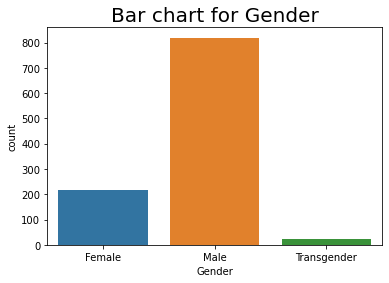

In [20]:
sns.countplot(df['Gender'])
plt.title("Bar chart for Gender", y=1, fontdict={"fontsize": 20})

([<matplotlib.patches.Wedge at 0x1946baa02b0>,
 [Text(-0.9084870934882562, 0.7839969393851361, 'Male'),
  Text(0.7795460983419338, -0.7760849699355531, 'Female'),
  Text(1.097213174296743, -0.07825119903020684, 'Transgender')],
 [Text(-0.529950804534816, 0.4573315479746627, '77.3%'),
  Text(0.42520696273196384, -0.42331907451030165, '20.4%'),
  Text(0.5984799132527688, -0.04268247219829464, '2.3%')])

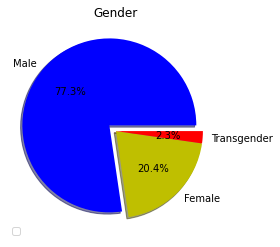

In [21]:
Gender=df['Gender'].value_counts()
values = [Gender[0],Gender[1],Gender[2]]
colors = ['b', 'y','r']
labels = ['Male','Female','Transgender']
explode = (0.1, 0, 0)
plt.title('Gender')
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

Text(0.5, 1, 'Bar chart for Country')

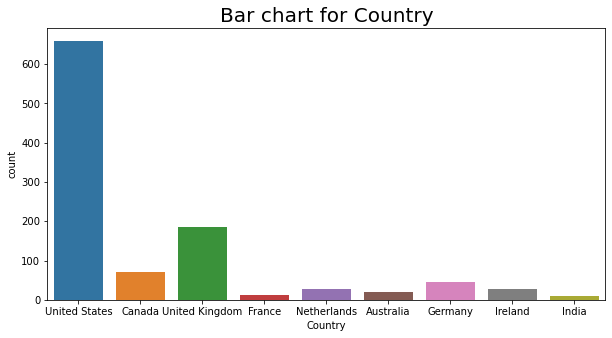

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(df['Country'])
plt.title("Bar chart for Country", y=1, fontdict={"fontsize": 20})

([<matplotlib.patches.Wedge at 0x1946bb3a910>,
 [Text(-0.4497479912907663, 1.1125316823937739, 'US'),
  Text(-0.27602340168652406, -1.064805654437184, 'CA'),
  Text(0.5358099403861442, -0.9606808563635464, 'UK'),
  Text(0.8306442965908022, -0.721131092479843, 'France'),
  Text(0.9646282940347967, -0.5286702699675083, 'Netherland'),
  Text(1.0366057815030734, -0.3680332237100381, 'Australia'),
  Text(1.0783434419593236, -0.21719903587106307, 'Germany'),
  Text(1.0947331544059622, -0.1075142811182405, 'Ireland'),
  Text(1.099516010913491, -0.03262731593135146, 'India')],
 [Text(-0.26235299491961367, 0.6489768147297015, '62.2%'),
  Text(-0.15055821910174036, -0.5808030842384639, '17.5%'),
  Text(0.2922599674833513, -0.5240077398346616, '6.8%'),
  Text(0.4530787072313466, -0.3933442322617325, '4.2%'),
  Text(0.5261608876553435, -0.28836560180045906, '2.5%'),
  Text(0.5654213353653127, -0.20074539475092984, '2.5%'),
  Text(0.5881873319778128, -0.1184722013842162, '2.0%'),
  Text(0.597127175

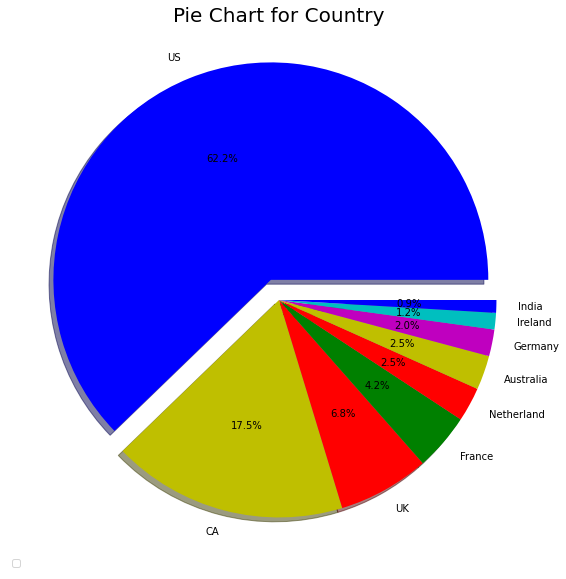

In [23]:
plt.figure(figsize = (20,10))
Country=df['Country'].value_counts()
values = [Country[0],Country[1],Country[2],Country[3],Country[4],Country[5],Country[6],Country[7],Country[8]]
colors = ['b', 'y','r','g','r','y','m','c']
labels = ['US','CA','UK','France','Netherland','Australia','Germany','Ireland','India']
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.title('Pie Chart for Country', y=1, fontdict={"fontsize": 20})
plt.legend(labels,loc=3)
plt.pie(values, colors=colors, labels=labels,
explode=explode, autopct='%1.1f%%', counterclock=True, shadow=True)

Text(0.5, 1, 'Bar chart for CareOptions')

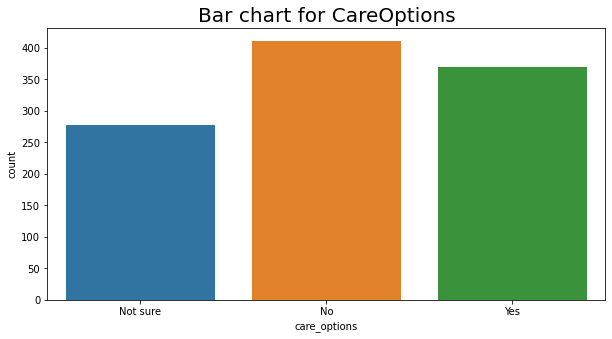

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(df['care_options'])
plt.title("Bar chart for CareOptions", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Bar chart for Work Interfere')

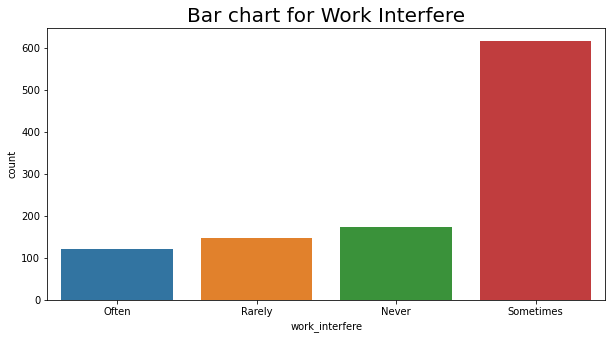

In [25]:
plt.figure(figsize = (10,5))
sns.countplot(df['work_interfere'])
plt.title("Bar chart for Work Interfere", y=1, fontdict={"fontsize": 20})

Text(0.5, 1, 'Bar chart for Family History')

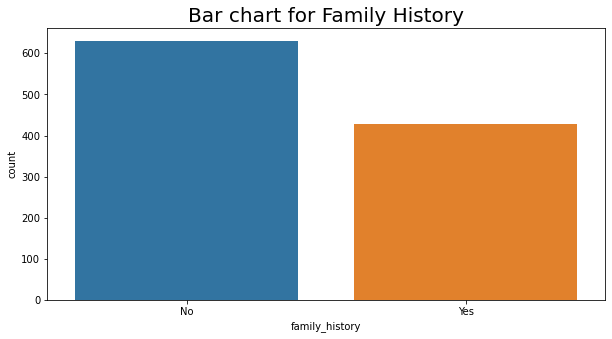

In [26]:
plt.figure(figsize = (10,5))
sns.countplot(df['family_history'])
plt.title("Bar chart for Family History", y=1, fontdict={"fontsize": 20})

### Bivariate Analysis :

In [27]:
from scipy.stats import chi2_contingency

def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False

    print(exp_val)
    print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)

    if p_val < 0.05:# consider significan level is 5%
        print("\nThere is some correlation between the two variables at significance level 0.05")
    else:
        print("\nThere is no correlation between the two variables")

In [28]:
chi_square("work_interfere","family_history")

[[103.51274788  70.48725212]
 [ 71.98300283  49.01699717]
 [ 87.45042493  59.54957507]
 [367.05382436 249.94617564]]

Chi-square is : 49.906260 

p_value is : 0.000000 

degree of freedom is : 3

There is some correlation between the two variables at significance level 0.05


In [29]:
chi_square("work_interfere","Country")

[[  3.45042493  11.83002833   2.13597734   7.39376771   1.64305949
    4.43626062   4.43626062  30.39660057 108.2776204 ]
 [  2.39943343   8.2266289    1.48536355   5.14164306   1.14258735
    3.08498584   3.08498584  21.13786591  75.29650614]
 [  2.91501416   9.99433428   1.80453258   6.24645892   1.38810198
    3.74787535   3.74787535  25.67988669  91.47592068]
 [ 12.23512748  41.9490085    7.57412653  26.21813031   5.82625118
   15.73087819  15.73087819 107.78564684 383.94995279]]

Chi-square is : 20.060240 

p_value is : 0.693345 

degree of freedom is : 24

There is no correlation between the two variables


<AxesSubplot:xlabel='family_history', ylabel='Age'>

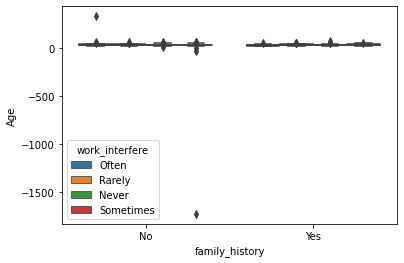

In [30]:

sns.boxplot(x='family_history', y='Age', data=df, hue='work_interfere')

<AxesSubplot:ylabel='Age'>

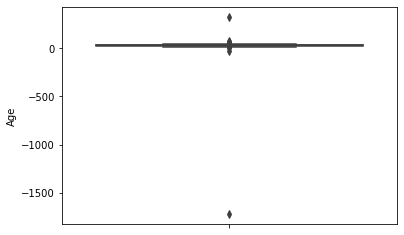

In [31]:
sns.boxplot(y=df['Age'])

### Outlier Analysis & Handling Outliers for 'Age' column.

In [32]:
#lower inner fence: Q1 - 1.5*IQR
#upper inner fence: Q3 + 1.5*IQR
def outlier_analysis(col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UIF=Q3+1.5*(IQR)
    LIF=Q1-1.5*(IQR)
    df_out =df[(df[col]<LIF) | (df[col]>UIF)] # I created a new data set that has just include potential outliers
    sns.distplot(df_out[col])#Plotting univariate distributions.By default, this will draw a histogram and fit a kernel density estimate (KDE)
   
    return df_out[col] .describe()

count      31.000000
mean        1.258065
std       325.047275
min     -1726.000000
25%        50.000000
50%        55.000000
75%        57.000000
max       329.000000
Name: Age, dtype: float64

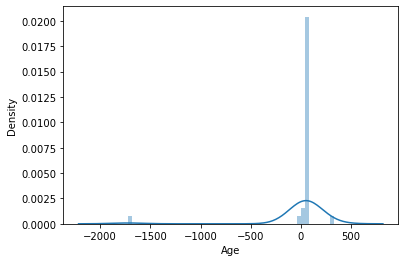

In [33]:
outlier_analysis('Age')

In [34]:
df['Age']=df['Age'].replace(-1726.00, 55.00)


In [35]:
df['Age']=df['Age'].replace(-29.00, 29.00)

In [36]:
df['Age']=df['Age'].replace(-1, 55.00)

In [37]:

df['Age']=df['Age'].replace(99999999999.00, 55.00)

In [38]:
df['Age']=df['Age'].replace(329, 55.00)

count    30.000000
mean     52.500000
std      13.032453
min       5.000000
25%      51.000000
50%      55.000000
75%      57.000000
max      72.000000
Name: Age, dtype: float64

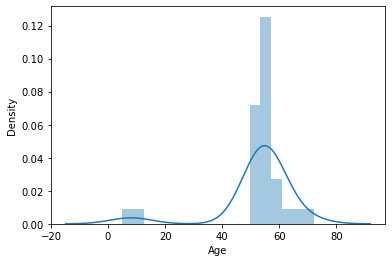

In [39]:
outlier_analysis('Age')

<AxesSubplot:ylabel='Age'>

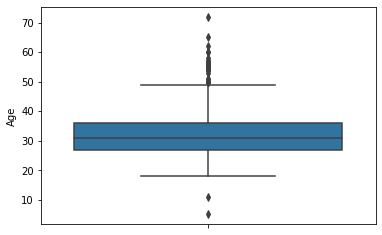

In [40]:
sns.boxplot(y=df['Age'])

### Fixing The Outliers :

In [41]:
#I want to replace values bigger than upper outer fence with upper outer fence and values less than lower outer fence with
#lower outer fence
#lower outer fence: Q1 - 3*IQR
#upper outer fence: Q3 + 3*IQR
def fixing_outliers(col):#col is name of column that you want to fix its outliers
    i=0 # i is number of outliers that they are less than lower outer fence
    j=0 # j is  number of outliers that they are bigger than upper outer fence
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    UOF=Q3+3*(IQR)#UOF=upper outer fence
    LOF=Q1-3*(IQR)#LOF=lower outer fence
    Clean_col=[] # Create a list to assign value
    for val in df[col]:#val is value of that column . here we select values of that column one by one and execute the loop
        if val<LOF:   
            Clean_col.append(LOF)# if value is less than LOF we will repalce that with LOF
            i+=1
        elif val>UOF :  # if value is bigger than UOF we will repalce that with UOF 
            Clean_col.append(UOF)
            j+=1
        else : Clean_col.append(val)
    df[col]=Clean_col # update the column by assigning Clean_col
    sns.distplot(df[col])#Plotting univariate distributions
    print('Number of outliers that they are less than lower outer fence: ',i,'\nNumber of outliers that they are bigger than upper outer fence: ',j)
    return df[col] .describe()

Number of outliers that they are less than lower outer fence:  0 
Number of outliers that they are bigger than upper outer fence:  2


count    1059.000000
mean       32.133144
std         7.398987
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        63.000000
Name: Age, dtype: float64

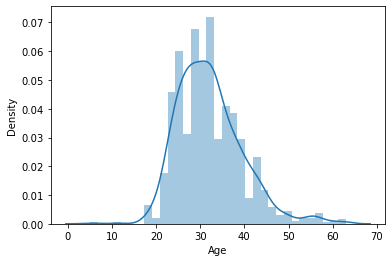

In [42]:
fixing_outliers('Age')

<AxesSubplot:ylabel='Age'>

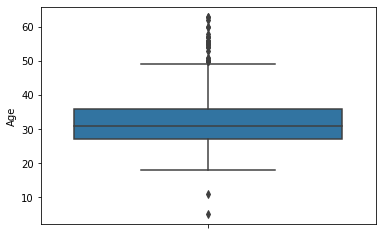

In [43]:
sns.boxplot(y=df['Age'])

<AxesSubplot:xlabel='family_history', ylabel='Age'>

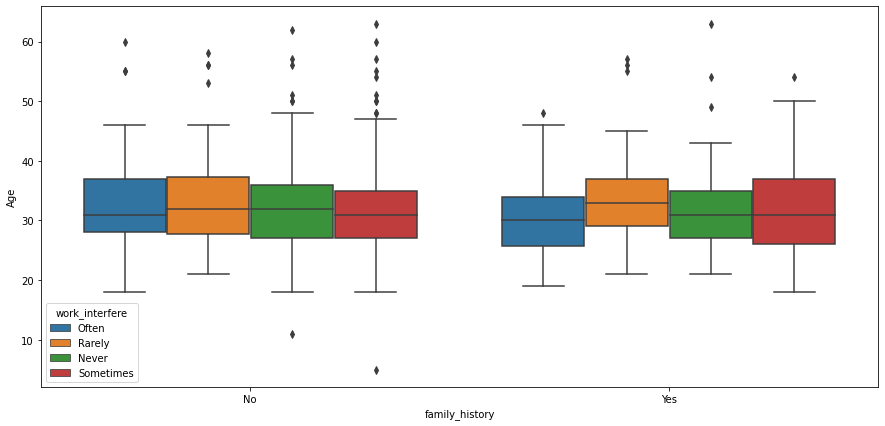

In [44]:
plt.figure(figsize = (15,7))
sns.boxplot(x='family_history', y='Age', data=df, hue='work_interfere')

<AxesSubplot:xlabel='Gender', ylabel='Age'>

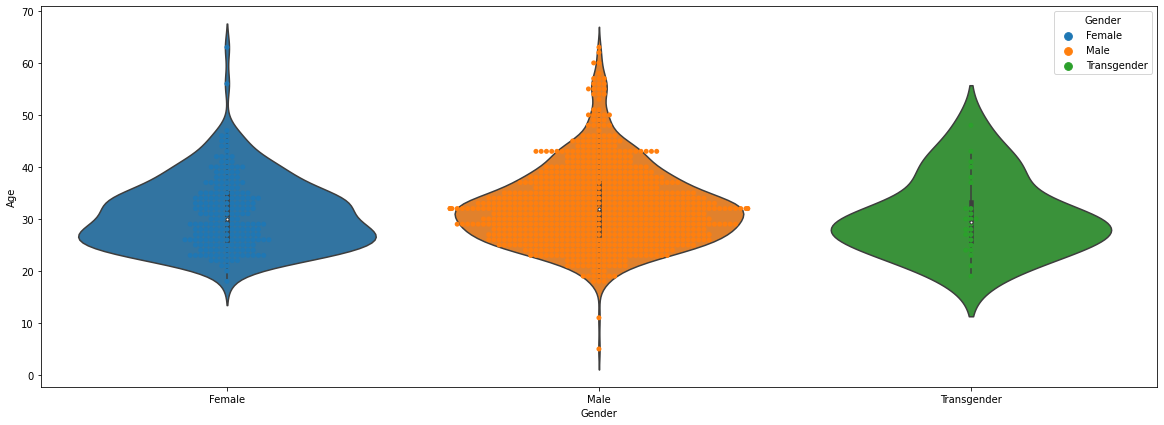

In [45]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Gender', y = 'Age', data = df, hue = 'Gender')
sns.violinplot(x = 'Gender', y = 'Age', data = df)

In [ ]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'family_history', y = 'work_interfere', data = df, hue = 'family_history')
sns.violinplot(x = 'family_history', y = 'work_interfere', data = df)

In [ ]:
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'self_employed', y = 'work_interfere', data = df, hue = 'self_employed')
sns.violinplot(x = 'self_employed', y = 'work_interfere', data = df)

df.columns = ['self_Employed','No_Peop_Org','Tech_Comp','IT_Role','Mental_Health_Coverage','','Country','State','Race','']

In [417]:
# Filter categorical variables
categorical_columns= {x for x in df.dtypes.index if df.dtypes[x]=='object'}

#Print frequencey of categories
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print(df[col].value_counts())


Frequency of Categories for varible supervisor
Yes             439
No              321
Some of them    299
Name: supervisor, dtype: int64

Frequency of Categories for varible family_history
No     630
Yes    429
Name: family_history, dtype: int64

Frequency of Categories for varible phys_health_interview
Maybe    482
No       417
Yes      160
Name: phys_health_interview, dtype: int64

Frequency of Categories for varible no_employees
More than 1000    251
25-Jun            236
26-100            234
100-500           151
5-Jan             134
500-1000           53
Name: no_employees, dtype: int64

Frequency of Categories for varible Gender
Male           819
Female         216
Transgender     24
Name: Gender, dtype: int64

Frequency of Categories for varible mental_health_interview
No       853
Maybe    173
Yes       33
Name: mental_health_interview, dtype: int64

Frequency of Categories for varible phys_health_consequence
No       785
Maybe    229
Yes       45
Name: phys_health_consequ

### Encoding : Converting all Categorical Columns to Numeric for Modelling
Using Mapping :

In [51]:
df.supervisor = df.supervisor.map(
                    {
                        'No': 0,
                        'Yes': 1,
                        'Some of them': 2
                    }
                    )

df.family_history = df.family_history.map(
                    {
                        'No': 0,
                        'Yes': 1
                    }
                    )
df.phys_health_interview = df.phys_health_interview.map(
                    {
                        'No' : 0,
                        'Yes' : 1,                                              
                        'Maybe':2
                    }
                    )

#df.no_employees = df.no_employees.map(
 #                   {
 #                      'More than 1000': 1,
#                      '25-Jun': 2,
#                        '26-100': 3,
#                       '100-500': 4,
#                       '5-Jan' : 5,
#                       '500-1000' : 6
#                   }
#                   )

#df.Gender = df.Gender.map(
#                   {
#                        'Male':0,
#                       'Female': 1,
#                       'Transgender': 2
#                   }
#                   )
df.mental_health_interview = df.mental_health_interview.map(
                    {
                        'No':0,
                        'Maybe': 1,
                        'Yes': 2
                    }
                    )
df.phys_health_consequence = df.phys_health_consequence.map(
                    {
                        'No':0,
                        'Maybe': 1,
                        'Yes': 2
                    }
                    )

df.mental_health_consequence = df.mental_health_consequence.map(
                    {
                        'No':0,
                        'Yes': 1,
                        'Maybe': 2
                    }
                    )
df.seek_help = df.seek_help.map(
                    {
                        'No':0,
                        'Yes': 1,
                        "Don't know" :2
                    }
                    )

df.treatment = df.treatment.map(
                    {
                        'No': 0,
                        "Yes": 1
                    }
                    )
df.self_employed = df.self_employed.map(
                    {
                        'No': 0,
                        "Yes": 1
                    }
                    )

df.obs_consequence = df.obs_consequence.map(
                    {
                        'No': 0,
                        "Yes": 1
                    }
                    )
df.tech_company = df.tech_company.map(
                    {
                        'No': 0,
                        "Yes": 1
                    }
                    )

df.remote_work = df.remote_work.map(
                    {
                        'No': 0,
                        "Yes": 1
                    }
                    )

df.coworkers = df.coworkers.map(
                    {
                        'No': 0,
                        "Yes": 1,
                        'Some of them': 2
                    }
                    )
df.benefits = df.benefits.map(
                    {
                        'No': 0,
                        "Yes": 1,
                        "Don't know" : 2
                    }
                    )

df.care_options = df.care_options.map(
                    {
                        'No': 0,
                        "Yes": 1,
                        "Not sure" : 2
                    }
                    )

df.anonymity = df.anonymity.map(
                    {
                        'No': 0,
                        "Yes": 1,
                        "Don't know" : 2
                    }
                    )
df.mental_vs_physical = df.mental_vs_physical.map(
                    {
                        'No': 0,
                        "Yes": 1,
                        "Don't know" : 2
                    }
                    )

df.wellness_program = df.wellness_program.map(
                    {
                        'No': 0,
                        "Yes": 1,
                        "Don't know" : 2
                    }
                    )

df.work_interfere = df.work_interfere.map(
                    {
                        'Never' : 0,
                        'Rarely': 1,
                        'Sometimes' : 2,
                        'Often' : 3
                    }
                    )




### Using One Hot Encoding for Discrete Categorical Variables : (get_Dummies)

In [52]:
df = pd.get_dummies(df,columns=['state','leave','Country','no_employees','Gender'],drop_first=True)

### Separating Independent variables(X) and Dependent variable (y) :

In [53]:
X = df.drop(['work_interfere'],axis=1)
y = df.work_interfere

X.head(5)

,Age,self_employed,family_history,treatment,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,...,Country_Netherlands,Country_United Kingdom,Country_United States,no_employees_25-Jun,no_employees_26-100,no_employees_5-Jan,no_employees_500-1000,no_employees_More than 1000,Gender_Male,Gender_Transgender
0,37.0,0,0,1,0,1,1,2,0,1,...,0,0,1,1,0,0,0,0,0,0
1,44.0,0,0,0,0,0,2,0,2,2,...,0,0,1,0,0,0,0,1,1,0
2,32.0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,31.0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
4,31.0,0,0,0,1,1,1,0,2,2,...,0,0,1,0,0,0,0,0,1,0


In [54]:
y.head(5)

0    3
1    1
2    1
3    3
4    0
Name: work_interfere, dtype: int64

### Splitting the Data to Independent variables (X) and Dependent Variable (y) :

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=0,test_size=0.2)

### Scaling independent variables(X) using Standard Scaler :

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#scale the features using training set

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc.transform(X_test))

In [57]:
df['work_interfere'].value_counts()

2    617
0    174
1    147
3    121
Name: work_interfere, dtype: int64

### Logistic Regression :
Using class_weight to deal with imbalance

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(multi_class='ovr',class_weight={1:1, 1:3, 1:4, 1:5}) 
                                                          
cross_val_score(LogisticRegression(random_state=0),X_train_scaled,y_train,cv=4).mean()

0.5265525798086381

In [59]:
#Training the model 
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={1: 5}, multi_class='ovr')

In [60]:
#Validating the model

model.score(X_test_scaled,y_test)

0.3443396226415094

### Grid Search for Logistic Regression :

In [62]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param = {"C":np.logspace(1,3,5), 
         "penalty":["l1","l2"]}# l1 lasso l2 ridge



lrmodel = GridSearchCV(LogisticRegression(multi_class='ovr'),param,cv=4)
lrmodel.fit(X_train,y_train)

print("tuned hyperparameters :(best parameters) ",lrmodel.best_params_)
print("accuracy :",lrmodel.best_score_)

tuned hyperparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.5513614414736654


In [64]:
lrmodel1 = LogisticRegression(C=10,penalty="l2")
lrmodel1.fit(X_train,y_train)

print("model score",lrmodel1.score(X_test,y_test))

model score 0.5188679245283019


In [65]:
from sklearn.metrics import  confusion_matrix, classification_report
y_pred = lrmodel1.predict(X_test)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.31      0.09      0.14        44
           1       0.67      0.07      0.12        29
           2       0.55      0.90      0.68       115
           3       0.00      0.00      0.00        24

    accuracy                           0.52       212
   macro avg       0.38      0.27      0.24       212
weighted avg       0.45      0.52      0.42       212



array([[  4,   1,  39,   0],
       [  1,   2,  24,   2],
       [  7,   0, 104,   4],
       [  1,   0,  23,   0]], dtype=int64)

In [66]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
#taking the second column for correct auc score
y_pred_prob = model.predict_proba(X_test)[:,1] 

#second column represents the '-' class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='-')

#plot the curve with auc score
import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

TypeError: 'bool' object is not subscriptable

### KNN - Calssifier :

In [67]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [68]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X_train_scaled,y_train,cv=3).mean()

0.4994152486446299

In [86]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,10,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X_train_scaled,y_train,cv=4).mean())

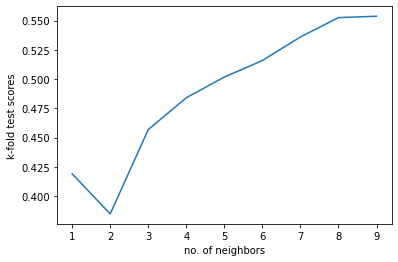

In [87]:
import matplotlib.pyplot as plt
plt.plot(range(1,10,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

#### 8-NN is the Best Model. The curve is starting to drop from 8 on x-axis which is "no.of neighbour"

In [88]:
knnmodel = KNeighborsClassifier(n_neighbors=8)
knnmodel.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [89]:
y_pred = knnmodel.predict(X_test)

In [90]:
knnmodel.score(X_test_scaled,y_test)

0.5235849056603774

### Hyper Parameter tuning using GridSearchcv :

In [91]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9],
          'weights':['uniform','distance'],
          'metric':['euclidean','manhattan']}

knnmodel1 = GridSearchCV(
                  KNeighborsClassifier(),
                  params,
                  cv = 4,
                  n_jobs = -1
                 )


knnmodel1.fit(X_train_scaled,y_train)
knnmodel1.best_params_

{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}

In [92]:
from sklearn.metrics import classification_report
y_pred = knnmodel1.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.17      0.02      0.04        44
           1       0.25      0.03      0.06        29
           2       0.55      0.93      0.69       115
           3       0.33      0.08      0.13        24

    accuracy                           0.52       212
   macro avg       0.32      0.27      0.23       212
weighted avg       0.40      0.52      0.40       212



### Random Forest Classifier :